In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns




In [51]:
df = pd.read_csv(r'C:\Users\devan\Downloads\retail_sales_dataset.csv')
print(df.info())
df.isna()
df.fillna('NaN')
df.duplicated()
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB
None
   Transaction ID        Date Customer ID  Gender  Age Product Category  \
0               1  2023-11-24     CUST001    Male   34           Beauty   
1               2  2023-02-27     CUST002  Female   26         Clothing   
2               3  2023-01-13     CUST003    Male   50      Electronics   
3               4  2023-05-21    

In [52]:
# descriptive statistics
print((df.describe()).round(2))

       Transaction ID      Age  Quantity  Price per Unit  Total Amount
count         1000.00  1000.00   1000.00         1000.00        1000.0
mean           500.50    41.39      2.51          179.89         456.0
std            288.82    13.68      1.13          189.68         560.0
min              1.00    18.00      1.00           25.00          25.0
25%            250.75    29.00      1.00           30.00          60.0
50%            500.50    42.00      3.00           50.00         135.0
75%            750.25    53.00      4.00          300.00         900.0
max           1000.00    64.00      4.00          500.00        2000.0


C:\Users\devan\AppData\Local\Temp\ipykernel_10920\3420403862.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_sales = df.groupby('month')['Total Amount'].sum()


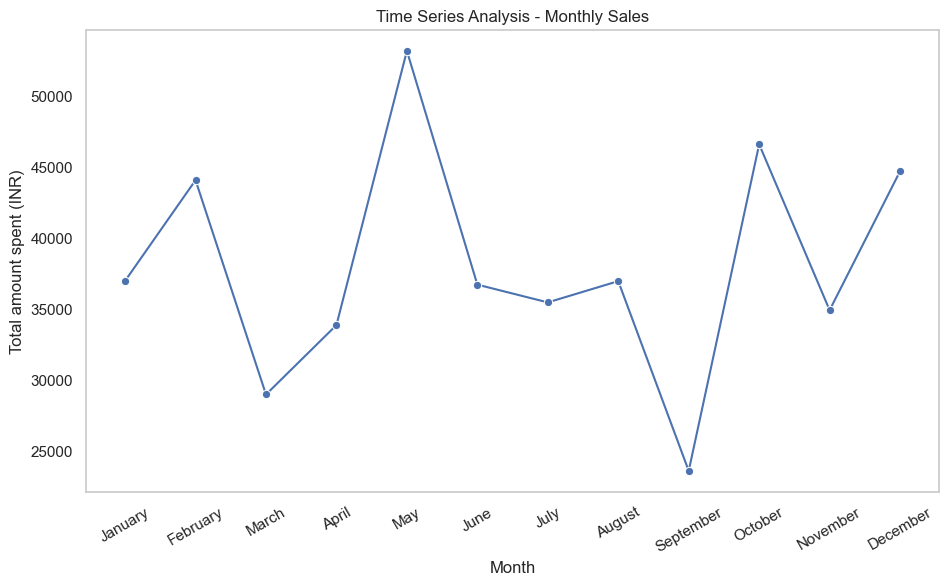

In [55]:
# time series analysis

# df['month'] = df['Date'].dt.month
df['Date'] = pd.to_datetime(df['Date'], format="%Y-%m-%d")

df['month'] = df['Date'].dt.strftime("%B")
order = ["January", "February", "March", "April", "May", "June",
         "July", "August", "September", "October", "November", "December"]

df['month'] = pd.Categorical(df['month'], categories=order, ordered=True)

monthly_sales = df.groupby('month')['Total Amount'].sum()


plt.figure(figsize=(11,6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o')
plt.title('Time Series Analysis - Monthly Sales')
plt.xlabel('Month')
plt.ylabel('Total amount spent (INR)')
plt.grid(False)
plt.xticks(rotation=30)
plt.show()


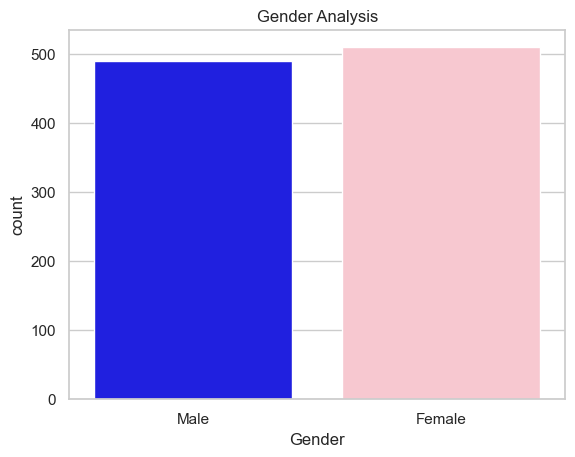

In [ ]:
# customer demographics analysis
color = ['blue', 'pink']
ax = sns.countplot(data = df, x = 'Gender', hue = 'Gender',palette = color)
plt.title('Gender Analysis')
plt.show()

   Gender  Total Amount
0  Female        232840
1    Male        223160


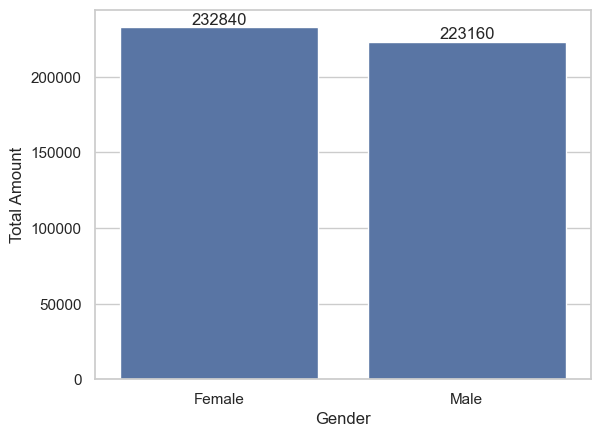

In [82]:
# spending analysis by gender
spend_analysis = df.groupby('Gender')['Total Amount'].sum().reset_index()
print(spend_analysis)
ax = sns.barplot(data = spend_analysis, x = 'Gender', y = 'Total Amount')
for container in ax.containers:
    ax.bar_label(container)
plt.show()

Product Category
Beauty         143515
Clothing       155580
Electronics    156905
Name: Total Amount, dtype: int64


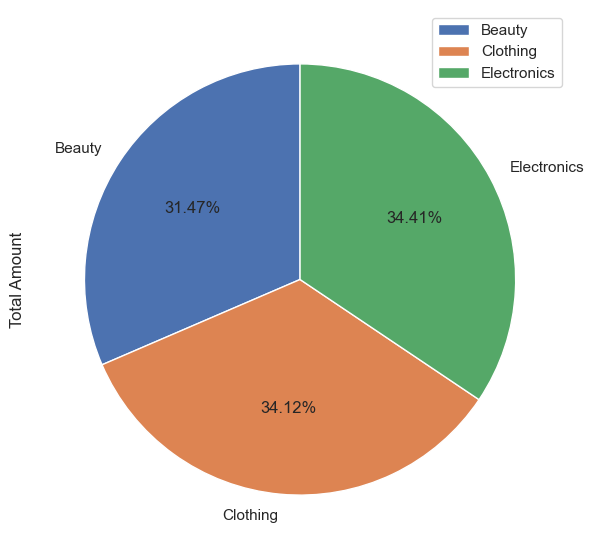

In [77]:
# revenue generated by category of products

revenue = df.groupby('Product Category')['Total Amount'].sum().sort_values(ascending = True)
print(revenue)
ax =revenue.plot.pie(autopct = '%2.2f%%', startangle = 90, legend = True, figsize = (7,7))
plt.show()

C:\Users\devan\AppData\Local\Temp\ipykernel_10920\1401320944.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  dist = df.groupby(['age group'], as_index = True)['Total Amount'].sum().reset_index()


  age group  Total Amount
0  below 18        121730
1     18-30        141955
2     30-45        147875
3     45-60         33225
4  above 60             0


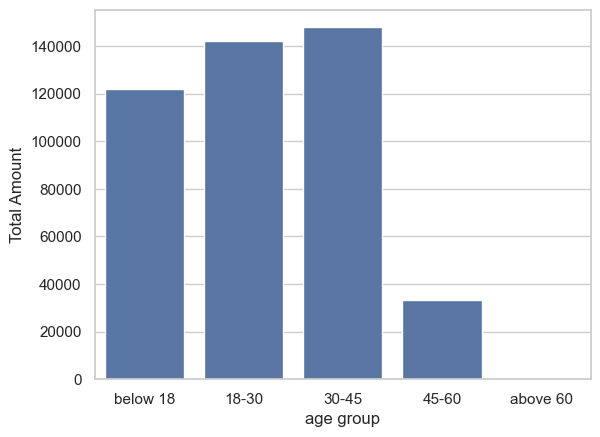

In [ ]:
# age group distribution for the customers 
df['age group'] = pd.cut(df['Age'], bins = [18, 30, 45, 60, 100, 120], labels = ['below 18', '18-30', '30-45', '45-60', 'above 60'])
# print(df['age group'])
dist = df.groupby(['age group'], as_index = True)['Total Amount'].sum().reset_index()
print(dist)
ax = sns.barplot(dist, x = 'age group', y = 'Total Amount')
plt.title('Age Disrtribution')
plt.show()

C:\Users\devan\AppData\Local\Temp\ipykernel_10920\759073994.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  avg_dist = df.groupby(['age group'], as_index = True)['Total Amount'].mean().round(2).reset_index()


  age group  Total Amount
0  below 18        483.06
1     18-30        468.50
2     30-45        446.75
3     45-60        357.26
4  above 60           NaN


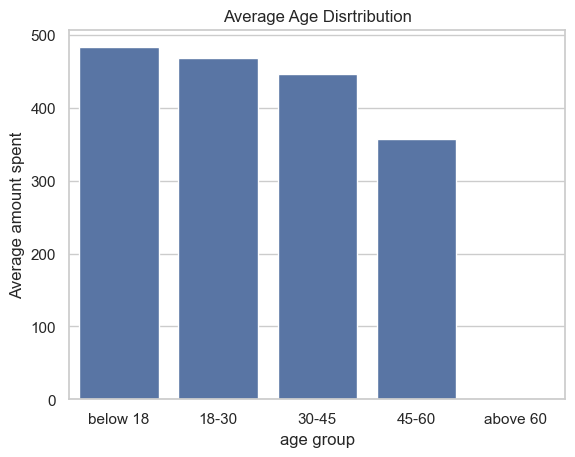

In [94]:
# average money spent by the age group
avg_dist = df.groupby(['age group'], as_index = True)['Total Amount'].mean().round(2).reset_index()
print(avg_dist)
ax = sns.barplot(avg_dist, x = 'age group', y = 'Total Amount')
plt.title('Average Age Disrtribution')
plt.ylabel('Average amount spent')
plt.show()

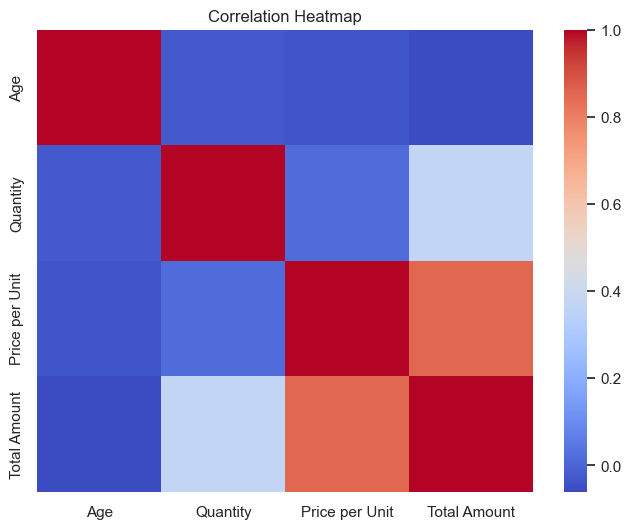

In [81]:


plt.figure(figsize=(8,6))
sns.heatmap(df[['Age','Quantity','Price per Unit','Total Amount']].corr(), cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [ ]:
Analysis and recommmendations:

-Time series
Analysis
May is the highest revenue month (~53k INR).
September is the lowest (~23k INR).
Sales peak again in October & December.
Sales fluctuate heavily, showing seasonality and inconsistent demand.

Recommendation
Increase marketing & stock before high-sales months (May, Oct, Dec).
Run discounts campaigns in low-sales months (March, July, September).
Introduce seasonal promotions aligned with high peaks (festivals, holidays).

-Gender
Analysis
Male (≈490) and Female (≈510) customers are almost equal.
No strong bias toward one gender.

Recommendations:
Implement gender-specific product recommendations (clothing, beauty categories).
Create personalized offers based on gender-sensitive product interest.
Keep campaigns gender-balanced since both segments behave similarly.

-Products
Analysis
Revenue share is almost equal
Electronics: 34.41%
Clothing: 34.12%
Beauty: 31.47%
Electronics performs slightly better.

Recommendations:
Increase visibility, ads, and bundles for Electronics (top category).
Expand Clothing with offers because it's close in performance.
Introduce combo offers (Beauty + Clothing) to improve Beauty category share.

-Spends by various age groups 
Highest total spending comes from age 30–45, followed by 18–30.
Below 18 spends surprisingly high (strong youth demand).
45–60 shows a strong drop
